# COVID-19 exclusive diagnositcs from hemogram

## Abstract

The present work proposes a method to predict the result of the SARS-CoV-2 RT-PCR result from a common hemogram test.

The presented model is the capable to issue 'Negative' result for 86% of the suspects from this dataset with less than 1% of False Negative. As the result, 86% of the SARS-CoV-2 RT-PCR test kits can be spared.

**The expected impact of such model is to save costs and lives during the COVID-19 pandemic peak of infections. It can be deployed as a triage process to decide which suspects need to proceed with the SARS-CoV-2 RT-PCR test kits**.


## Background
The World Health Organization (WHO) characterized the COVID-19, caused by the SARS-CoV-2, as a pandemic on March 11, while the exponential increase in the number of cases was risking to overwhelm health systems around the world with a demand for ICU beds far above the existing capacity, with regions of Italy being prominent examples.

Brazil recorded the first case of SARS-CoV-2 on February 26, and the virus transmission evolved from imported cases only, to local and finally community transmission very rapidly, with the federal government declaring nationwide community transmission on March 20.

Until March 27, the state of São Paulo had recorded 1,223 confirmed cases of COVID-19, with 68 related deaths, while the county of São Paulo, with a population of approximately 12 million people and where Hospital Israelita Albert Einstein is located, had 477 confirmed cases and 30 associated death, as of March 23. Both the state and the county of São Paulo decided to establish quarantine and social distancing measures, that will be enforced at least until early April, in an effort to slow the virus spread.

One of the motivations for this challenge is the fact that in the context of an overwhelmed health system with the possible limitation to perform tests for the detection of SARS-CoV-2, testing every case would be impractical and tests results could be delayed even if only a target subpopulation would be tested.

## Kaggle competition
The present notebook addresses only the TASK 1 (Predict confirmed COVID-19 cases among suspected cases) from [Kaggle competition](https://www.kaggle.com/einsteindata4u/covid19).

## Dataset
This dataset contains anonymized data from patients seen at the Hospital Israelita Albert Einstein, at São Paulo, Brazil, and who had samples collected to perform the SARS-CoV-2 RT-PCR and additional laboratory tests during a visit to the hospital.

All data were anonymized following the best international practices and recommendations. All clinical data were standardized to have a mean of zero and a unit standard deviation.

This dataset was originally uploaded at the [Kaggle website](https://www.kaggle.com/einsteindata4u/covid19#dataset.xlsx).

## Disclaimer
The [author of this notebook](https://diogodutra.github.io/) is a Machine Learning engineer and Lead Data Scientist. Michel Zreik and Bruno Mourao Siqueira are co-authors. The authors have no medical studies. Therefore, the authors can not be liable for the use of the present work. Use at your own discretion.

Feel free to contact at diogodutra@gmail.com to discuss these results or have another customized model for your data.

# Data Cleaning

Some minor data cleaning was performed directly on the xlsx file before running the code below for practical reasons:
- cells values replaced from 'Não Realizado' to 'not_done'
- cells values with ',' replaced by '.' to represent decimals numbers

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

# Data Load
Let's take a look at the data.

In [2]:
file = './data/dataset.xlsx'

data = pd.read_excel(file)

data.tail()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5643,2697fdccbfeb7f7,19,positive,0,0,0,0.694287,0.541564,-0.906829,-0.325903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Inspecting the table above leads to the following observations:
- The label to be predicted is: 'SARS-Cov-2 exam result'
- There are categorical and numerical data
- There are considerable amount of empty values (NaN), probably because not all patients performed every possible clinical exam.

# Data Preparation
Let's prepare the data for further plots.

In [3]:
# define the label to be predicted
label = 'SARS-Cov-2 exam result'

In [4]:
# replace positive/negative by 1/0
data[label] = [1 if result=='positive' else 0 for result in data[label]]

data.tail()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
5639,ae66feb9e4dc3a0,3,1,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5643,2697fdccbfeb7f7,19,1,0,0,0,0.694287,0.541564,-0.906829,-0.325903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Exploration
How many of the population is positive for the SARS-Cov-2 test?

In [5]:
ref = data[label].mean()

print(f'Percentage of all COVID-19 positives in data: {round(ref*100)}%')

Percentage of all COVID-19 positives in data: 10%


This number is important as a reference. It means that the "Naïve Classifier" blindly guesses that all patients are negative and its False Negative rate is 10%.

Therefore, our new classifier have to provide better performance than this reference in order to be useful.

Which features are in the data?

In [6]:
other_labels = [
    'Patient addmited to regular ward (1=yes, 0=no)'
    'Patient addmited to semi-intensive unit (1=yes, 0=no)',
    'Patient addmited to intensive care unit (1=yes, 0=no)',
]

In [7]:
features = list(set(data.columns) - set(['Patient ID', label] + other_labels))

features_numerical = []
features_categorical = []
features_empties = []

for feature in features:
    hues = set(data[feature][~data[feature].isna()])
    if len(hues)==0:
        features_empties.append(feature)
    else:
        is_string = isinstance(list(hues)[0], str)
        if is_string:
            features_categorical.append(feature)
        else:
            features_numerical.append(feature)
        
        
print(f'{len(features_numerical)} numerical features: ', ', '.join(features_numerical))
print()
print(f'{len(features_categorical)} categorical features: ', ', '.join(features_categorical))
print()
print(f'{len(features_empties)} discarded empty features: ', ', '.join(features_empties))

69 numerical features:  Potassium, Mean corpuscular hemoglobin concentration (MCHC), Urine - Red blood cells, Total CO2 (arterial blood gas analysis), Myelocytes, pCO2 (arterial blood gas analysis), Lymphocytes, Sodium, Phosphor, Lipase dosage, Fio2 (venous blood gas analysis), Hemoglobin, International normalized ratio (INR), Gamma-glutamyltransferase , Mean platelet volume , Basophils, Creatine phosphokinase (CPK) , Ferritin, Relationship (Patient/Normal), Albumin, pO2 (arterial blood gas analysis), Patient age quantile, Serum Glucose, Rods #, Arterial Lactic Acid, Creatinine, Mean corpuscular volume (MCV), ctO2 (arterial blood gas analysis), Red blood Cells, Hematocrit, Eosinophils, Promyelocytes, Platelets, Lactic Dehydrogenase, Ionized calcium , Alanine transaminase, pO2 (venous blood gas analysis), Leukocytes, HCO3 (arterial blood gas analysis), Neutrophils, Total Bilirubin, Patient addmited to regular ward (1=yes, 0=no), Metamyelocytes, Magnesium, Urea, pH (venous blood gas anal

There are 100 features available in the data. They are divided in 2 types: numerical and categorical.

6 features are empty so they are dropped from our analyses.

Which features from these 100 are really useful to tell between negative and positive for the SARS-Cov-2 test?

# Data Vizualization

The first plot I want to draw the attention is to the age, as shown below.

C:\Users\Diogo\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2446: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
C:\Users\Diogo\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2446: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


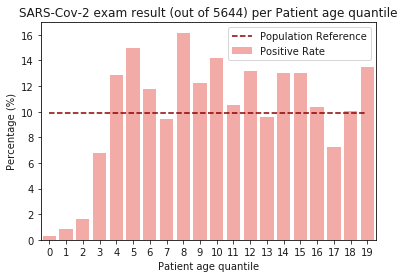

In [8]:
def plot_age(data, label, save=False):
    
    feature = 'Patient age quantile'
    
    plt.figure()
    
    # plot dashed reference line
    dat = data.groupby(feature).count().reset_index()
    x = list(dat[feature])
    y = [ref*100] * len(x)
    ax = sns.lineplot(x, y, c='darkred', label='Population Reference')
    ax.lines[0].set_linestyle("--")

    # Plot the percentages
    sns.set_color_codes('pastel')
    dat = data.groupby(feature).mean().reset_index()
    dat[label] = dat[label] * 100
    sns.barplot(x=feature, y=label, label='Positive Rate', data=dat, color='r')
    
    plt.legend()
    plt.ylabel('Percentage (%)')
    samples = data.groupby(feature)[label].count().sum()
    plt.title(f'{label} (out of {samples}) per {feature}')

    if save: plt.savefig(f'./plots/{label}/{label}_per_{feature.replace("/", "_")}.png')
        
        
plot_age(data, label)

The plot below shows that the babies (age quantile <= 2) are considerably less likely to have positive SARS-Cov-2 result. Therefore, age is useful and it is going to be included in the feature list.

All the rest of the categorical features are plotted below.

C:\Users\Diogo\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


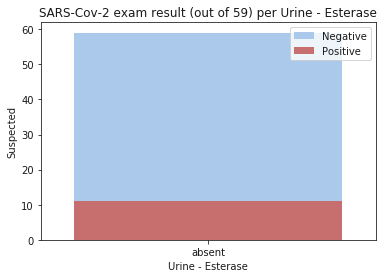

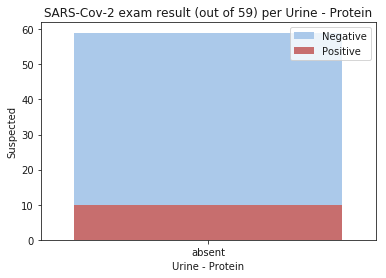

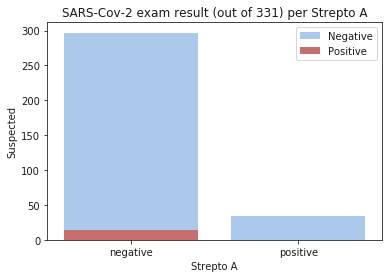

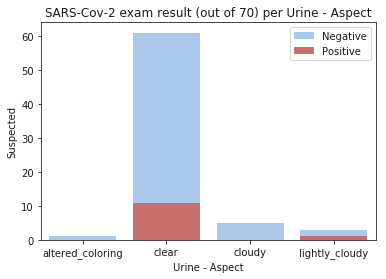

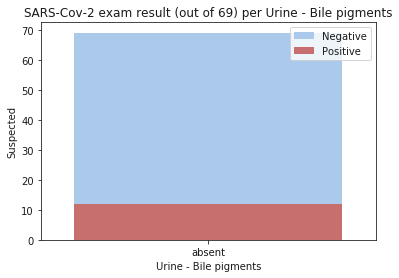

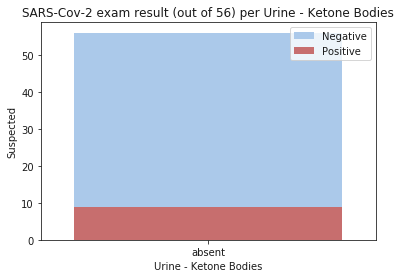

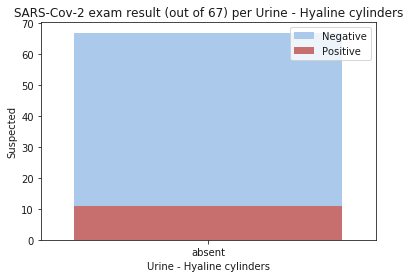

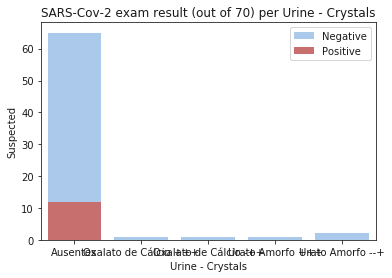

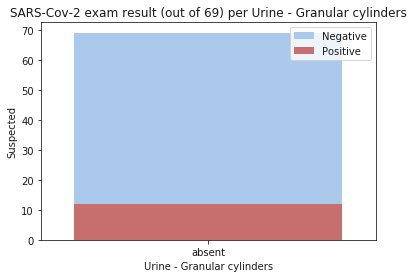

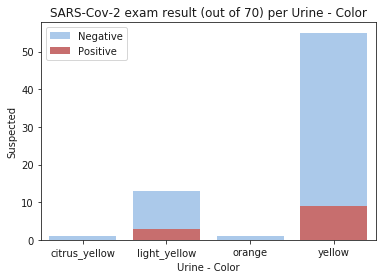

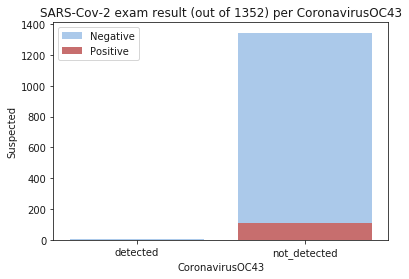

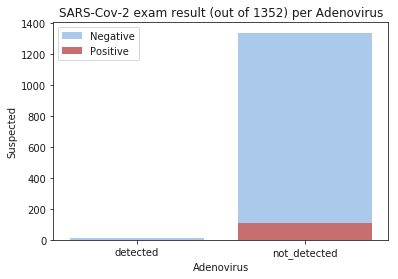

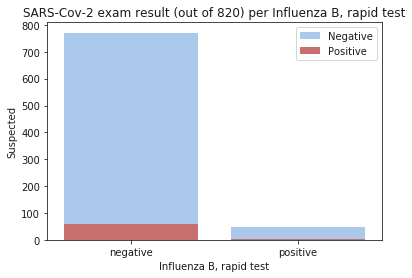

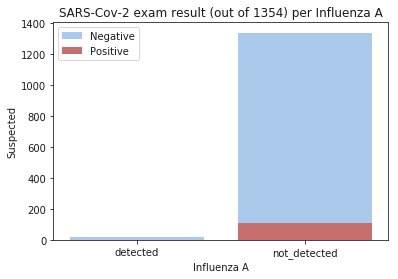

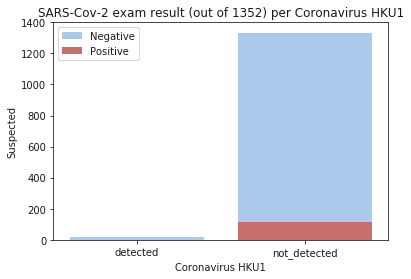

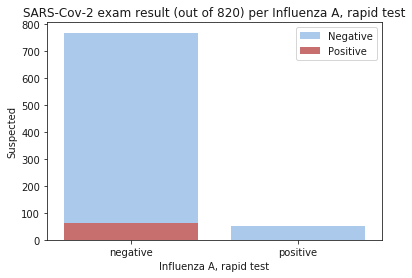

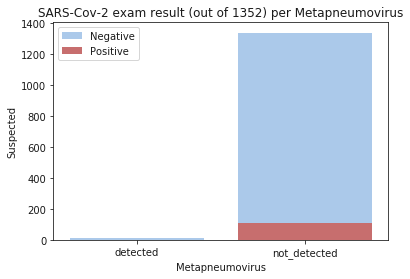

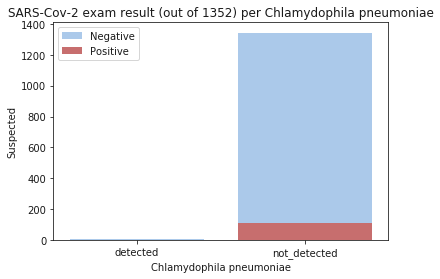

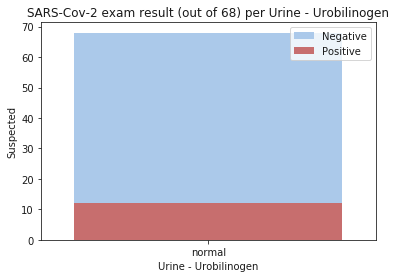

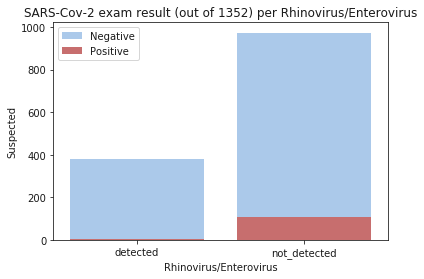

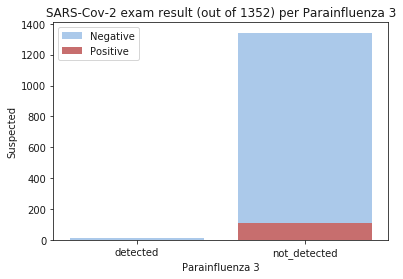

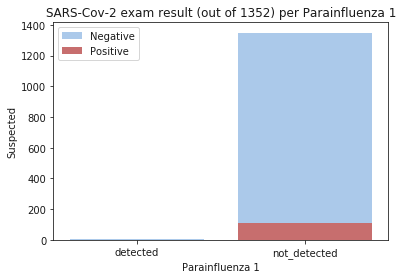

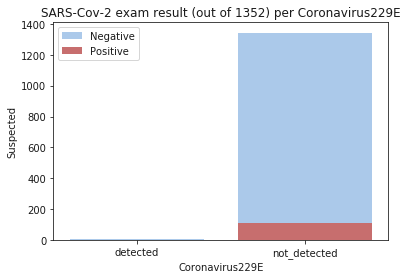

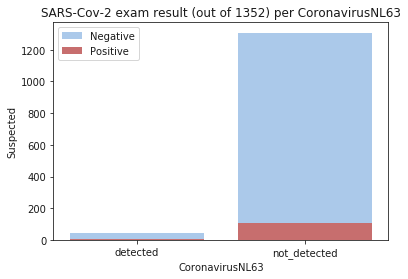

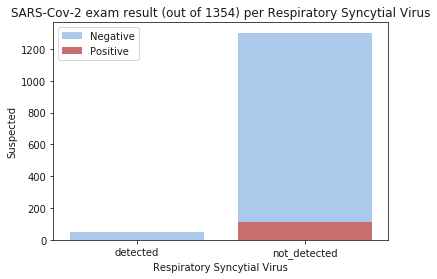

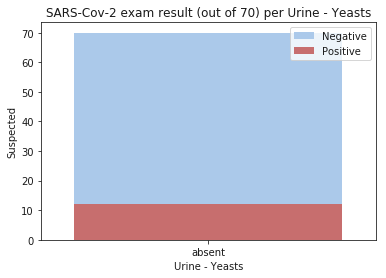

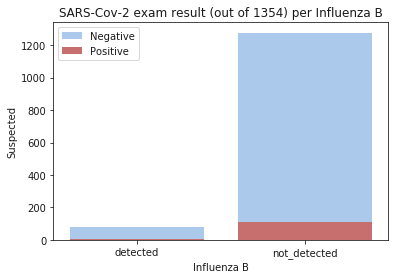

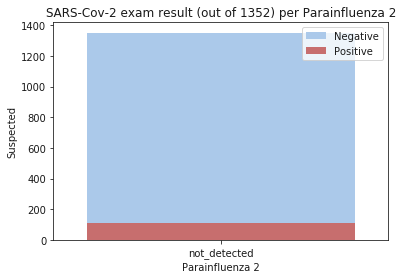

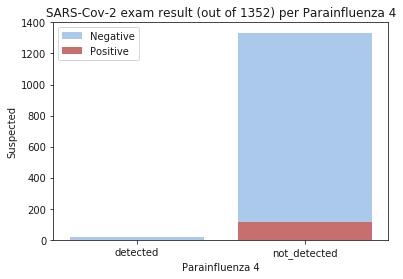

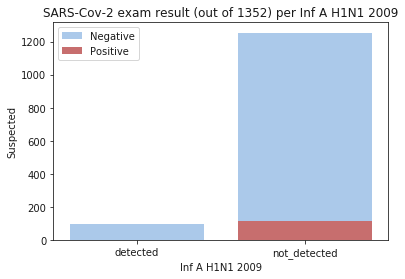

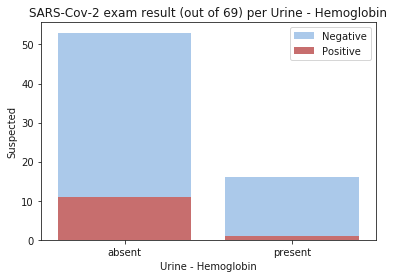

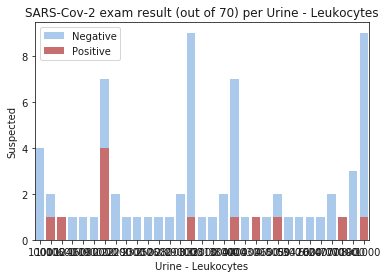

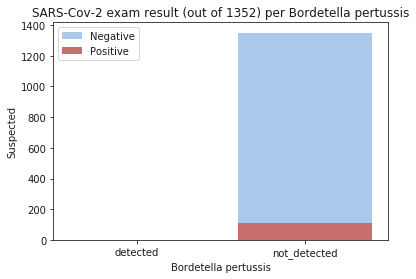

In [9]:
def plot_categorical(data, feature, label, save=False):
    plt.figure()

    dat = data.groupby(feature).count().reset_index()

    # Plot the total crashes
    sns.set_color_codes('pastel')
    sns.barplot(x=feature, y=label, label='Negative', data=dat, color='b')

    # Plot the total crashes
    sns.set_color_codes('muted')
    dat = data.groupby(feature).sum().reset_index()
    sns.barplot(x=feature, y=label, label='Positive', data=dat, color='r')
    
    plt.legend()
    plt.ylabel('Suspected')
    samples = data.groupby(feature)[label].count().sum()
    plt.title(f'{label} (out of {samples}) per {feature}')

    if save: plt.savefig(f'./plots/{label}/{label}_per_{feature.replace("/", "_")}.png')
        
        
for feature in features_categorical:
    plot_categorical(data, feature, label)

Besides the "Patient age quantile", all the other categorical features are not useful to predict the result of the SARS-Cov-2 for the following reasons:
- some have too few samples, preventing any meaninful conclusions (ie: Unire - Aspect)
- some have no meaninful separation between positive and negative (high entropy)

Let's move to the numerical features.

C:\Users\Diogo\Anaconda3\lib\site-packages\seaborn\distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\Diogo\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


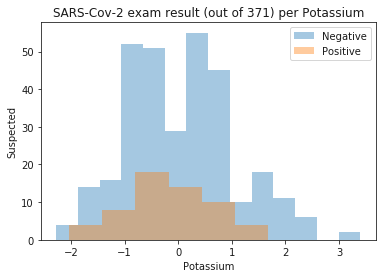

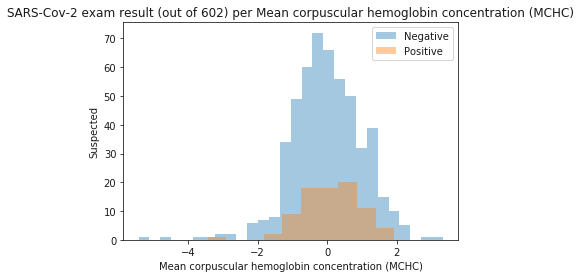

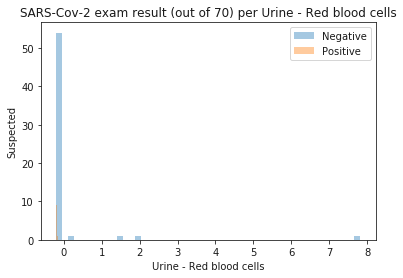

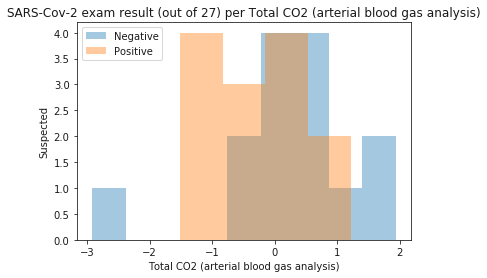

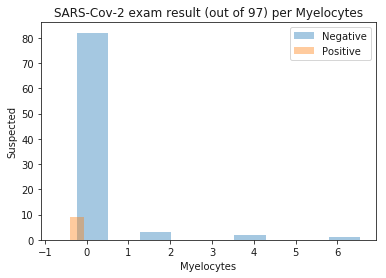

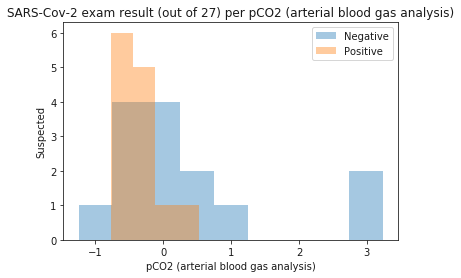

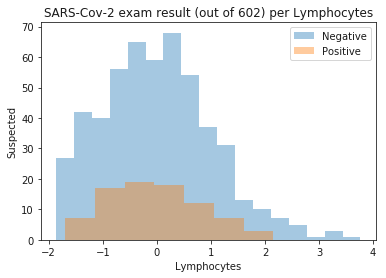

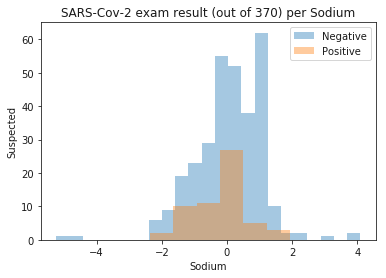

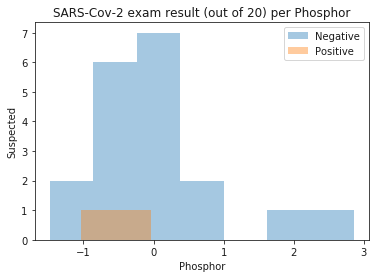

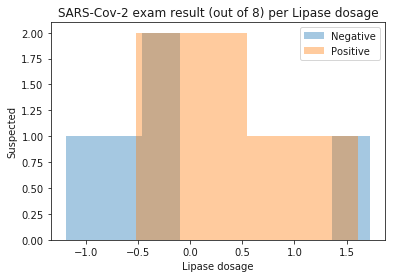

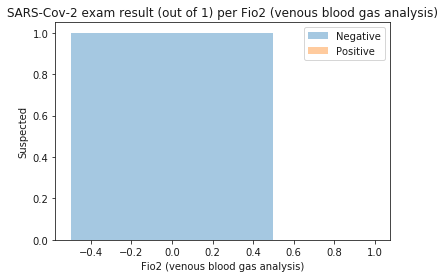

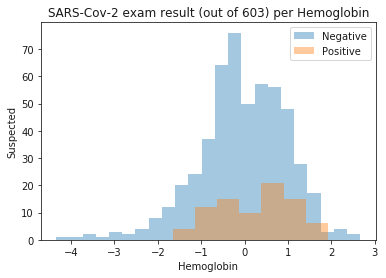

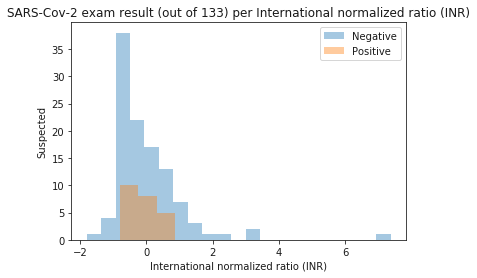

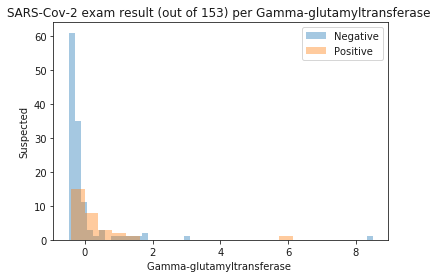

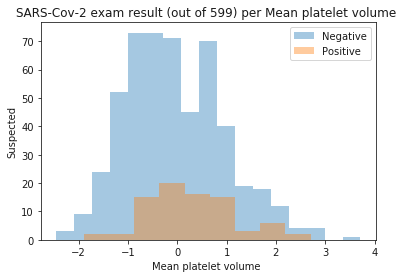

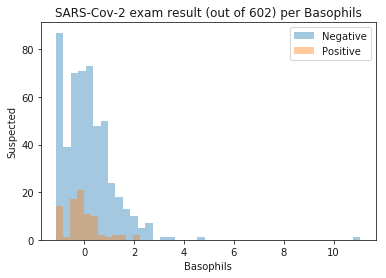

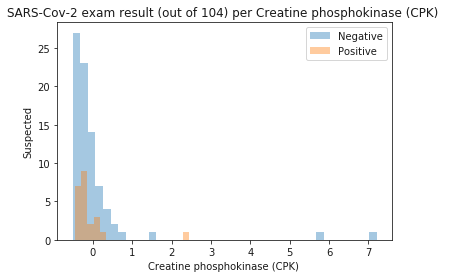

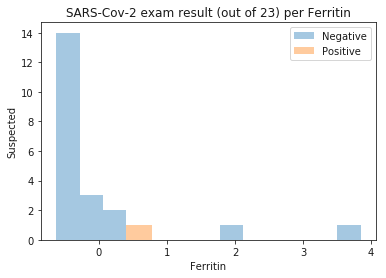

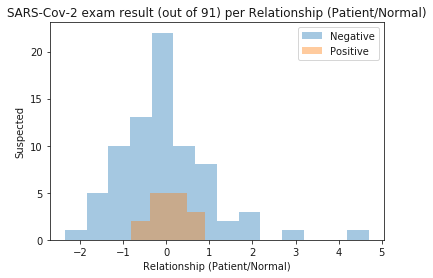

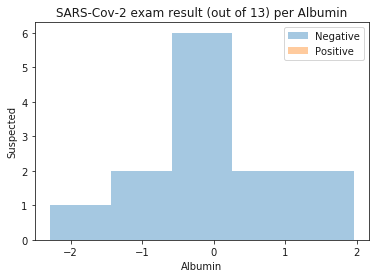

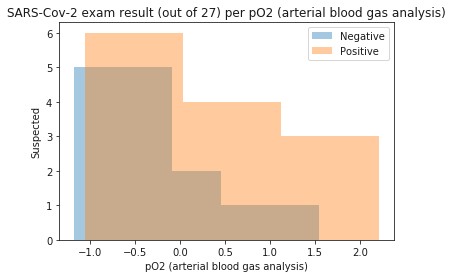

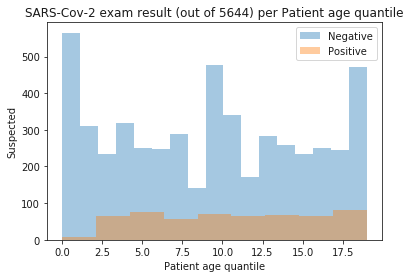

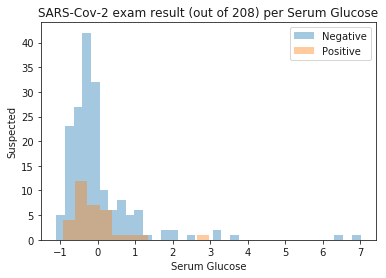

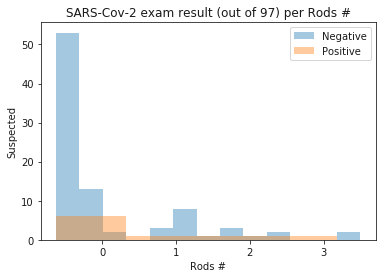

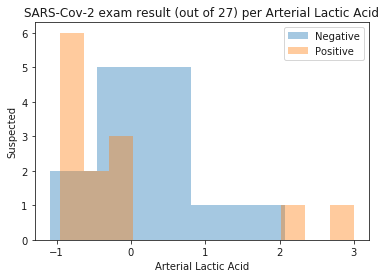

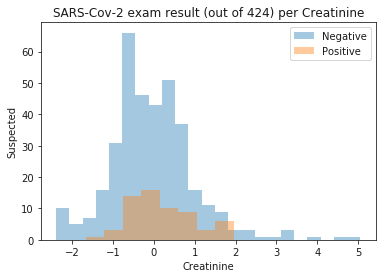

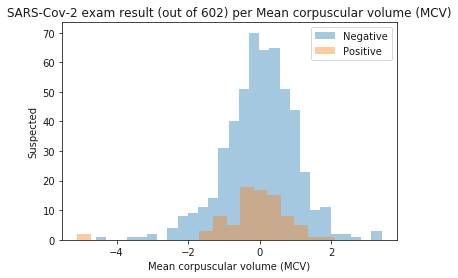

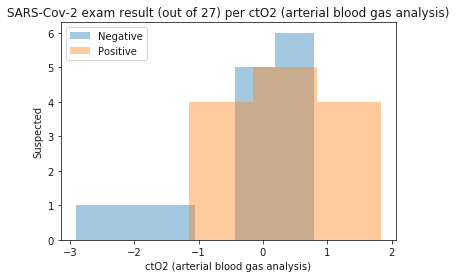

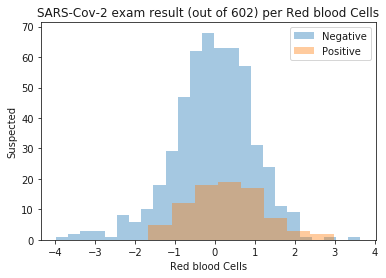

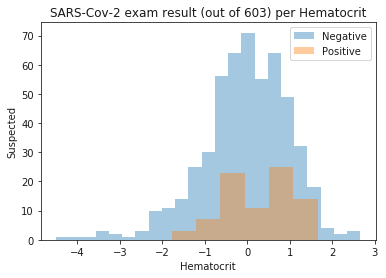

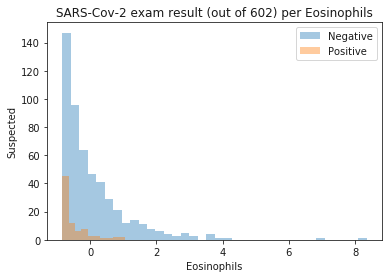

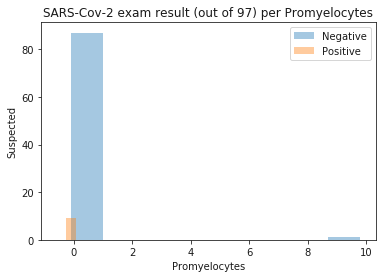

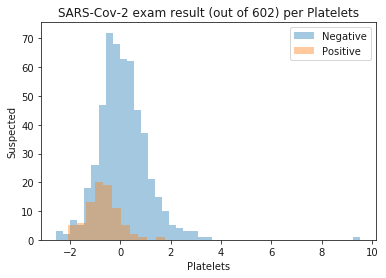

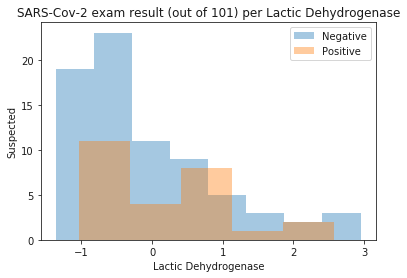

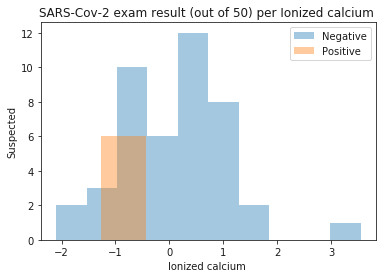

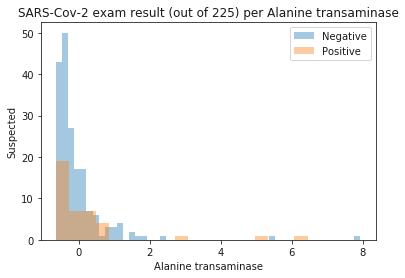

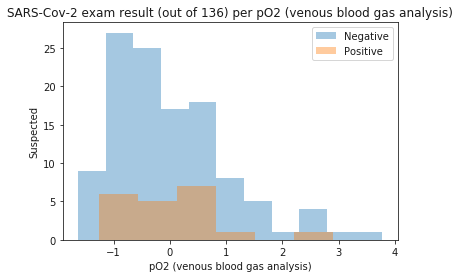

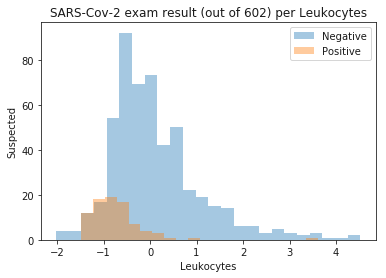

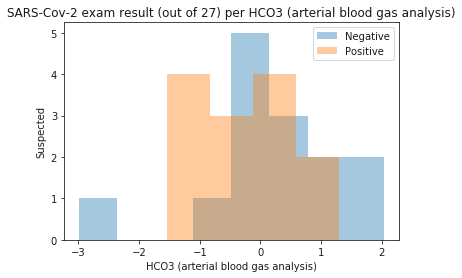

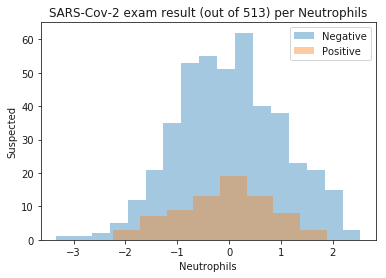

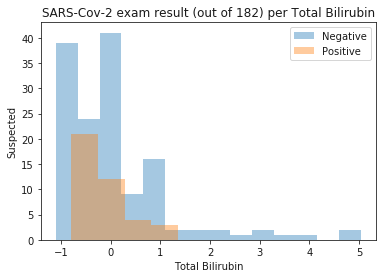

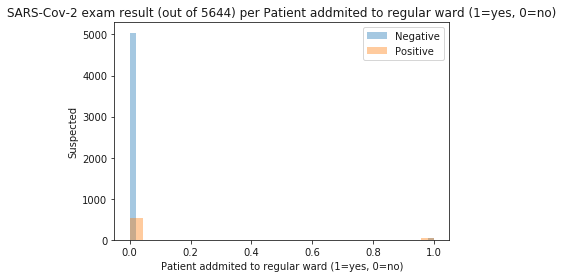

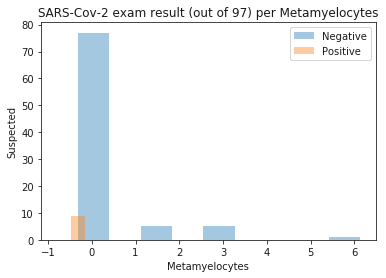

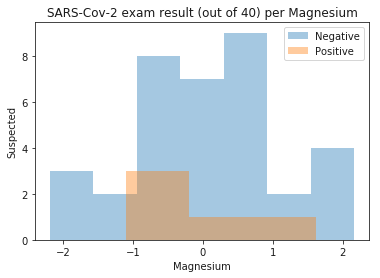

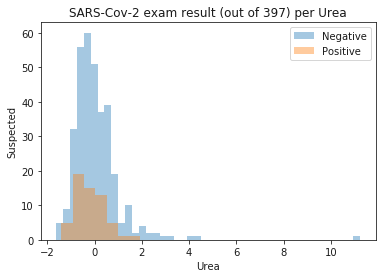

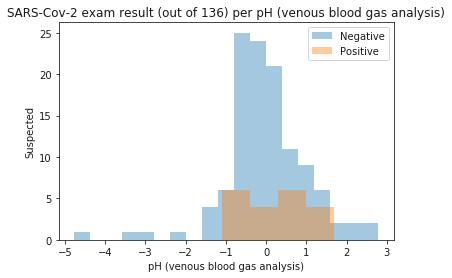

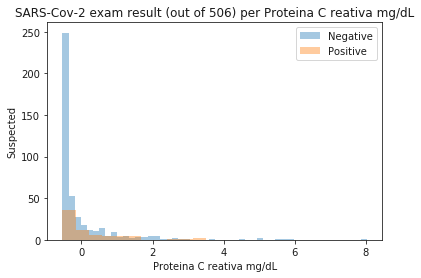

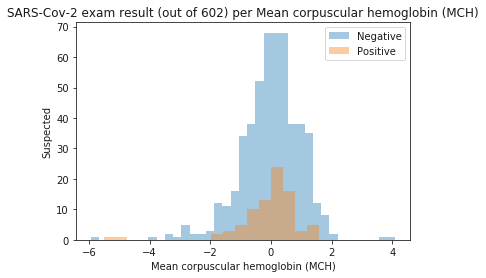

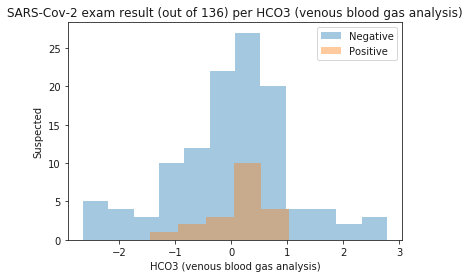

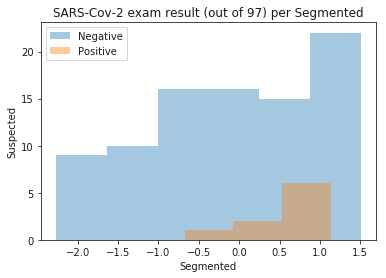

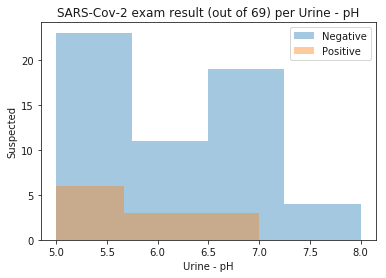

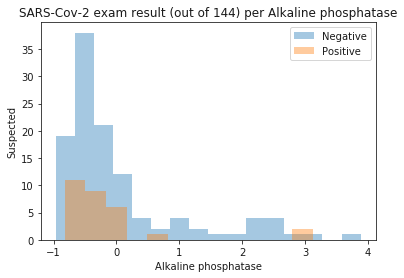

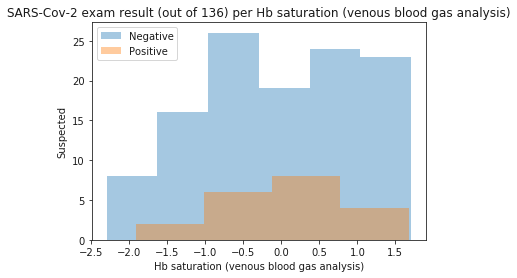

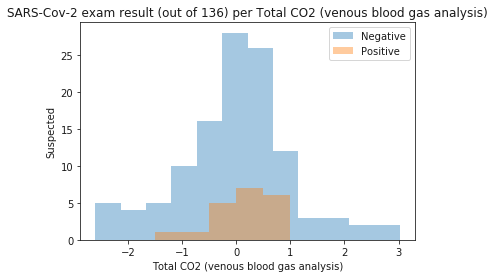

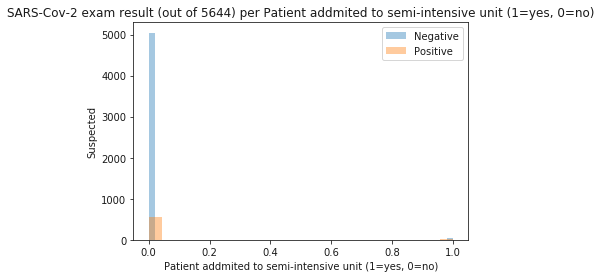

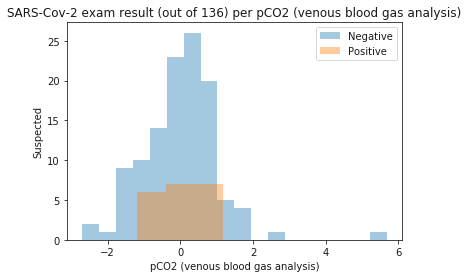

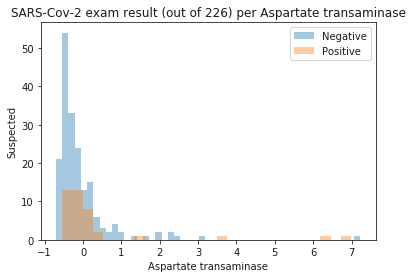

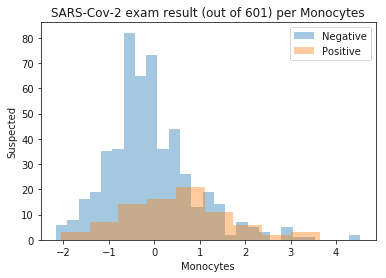

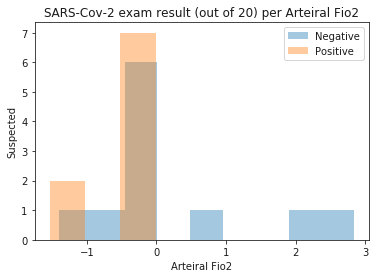

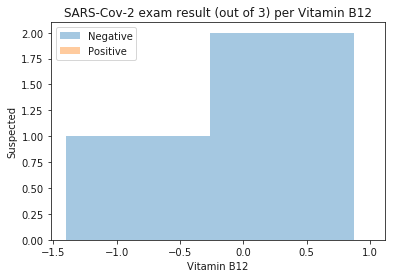

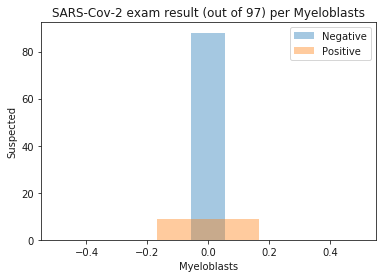

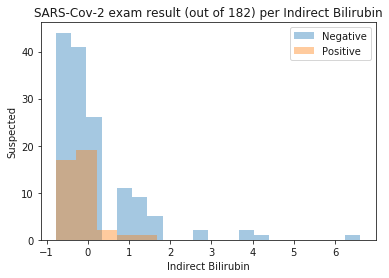

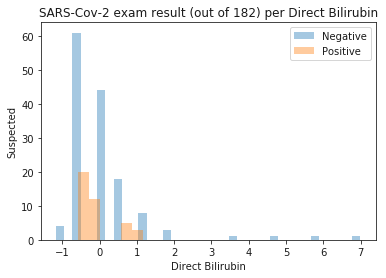

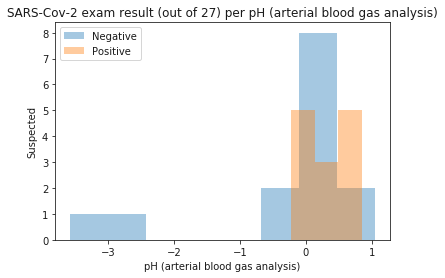

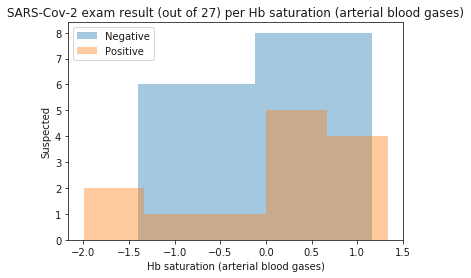

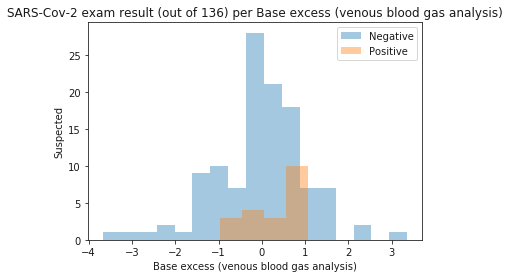

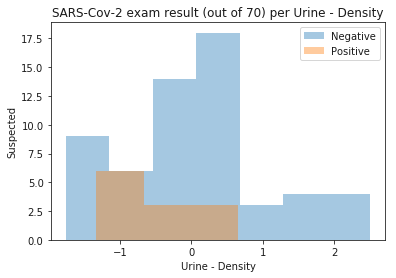

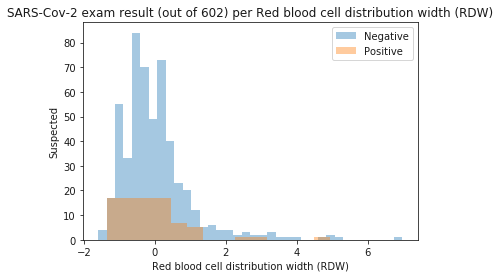

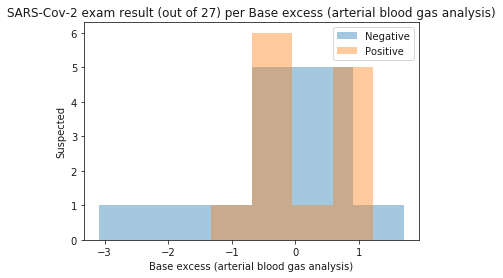

In [10]:
def plot_numerical(data, feature, label, save=False):
    plt.figure()
    hues = list(set(data[label]))
    for hue in hues:
        sns.distplot(data[feature][data[label]==hue].values, norm_hist=False, kde=False)

        
    hues = ['Negative' if hue==0 else 'Positive' if hue==1 else hue for hue in hues]
    plt.legend(hues)
    plt.xlabel(feature)
    plt.ylabel('Suspected')
    samples = data.groupby(feature)[label].count().sum()
    plt.title(f'{label} (out of {samples}) per {feature}')
    if save: plt.savefig(f'./plots/{label}/{label}_per_{feature.replace("/","_")}.png')
    

for feature in features_numerical:
    plot_numerical(data, feature, label)

Most of the numerical features have the same problem explained above for the categorical features.

However, there are some that indeed show some difference in the distribution between positive and negative:
- Leukocytes
- Monocytes
- Platelets

Let's use these chosen features to create some cluster plots and double-check if they are useful.

In [11]:
features_covid = [
    'Leukocytes',
    'Monocytes',
    'Platelets',
    'Patient age quantile',
]

dat = data[features_covid + [label,]].dropna()

print(dat.shape)
dat.head()

(601, 5)


,Leukocytes,Monocytes,Platelets,Patient age quantile,SARS-Cov-2 exam result
1,-0.094610,0.357547,-0.517413,17,0
8,0.364550,0.068652,1.429667,1,0
15,-0.884923,1.276759,-0.429480,9,0
18,-0.211488,-0.220244,0.072992,11,0
22,-1.132592,2.012129,-0.668155,9,0


Text(0.5,1,'Clusters Leukocytes-Platelets')

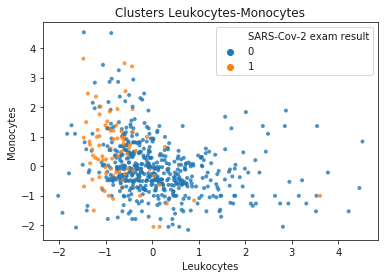

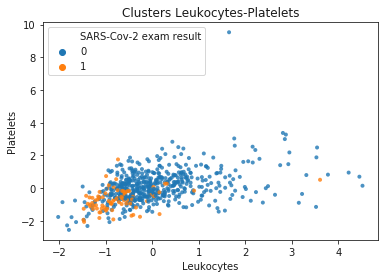

In [12]:
plt.figure()
sns.scatterplot(x=features_covid[0], y=features_covid[1], hue=label, data=dat, 
                  linewidth=0, s=16, alpha = 0.8)
plt.title(f'Clusters {features_covid[0]}-{features_covid[1]}')

plt.figure()
sns.scatterplot(x=features_covid[0], y=features_covid[2], hue=label, data=dat, 
                  linewidth=0, s=16, alpha = 0.8)
plt.title(f'Clusters {features_covid[0]}-{features_covid[2]}')

The plots above do show some distintict regions for positive and negative clusters.

However, there is a considerable overlap of negatives over some positives. For this reason, we shall not expect to have a flawless classifier trained over these data.

For this reason, our strategy for now on is find a test to reliably tell if a patient is negative (ie: 0 or blue) with low False Negative.

In other words, our new classifier will predict as either:
    - 0 = Negative
    - 1 = Inconclusive

# Create Model

Scale features between 0 and 1 to ensure data normalization, improving the classifier performance.

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = dat[features_covid].values
y = dat[label].values

X = scaler.fit_transform(X)

print(X.min(), X.max())
print(X)

0.0 1.0
[[ 0.29434284  0.37647056  0.16839917  0.89473684]
 [ 0.36452575  0.33333333  0.32952185  0.05263158]
 [ 0.1735432   0.51372545  0.17567568  0.47368421]
 ..., 
 [ 0.2245853   0.45882351  0.17047818  0.78947368]
 [ 0.04381117  0.52941174  0.06444907  0.89473684]
 [ 0.11186731  0.40784312  0.13617464  1.        ]]


Split the data into train and test.

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

test_ratio = .2

X_train, X_test, y_train, y_test = train_test_split(X, y,
        test_size=test_ratio, shuffle=True)

print(X_train.shape)
print(X_test.shape)

(480, 4)
(121, 4)


Let's check what is the Naïve Classifier performance as benchmark.

In [15]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, fbeta_score

avg = y_train.mean()
avg_int = round(avg)

y_naive = [avg] * len(y_test)
y_naive_int = [avg_int] * len(y_test)

score_naive = mean_absolute_error(y_test, y_naive)
score_naive_int = mean_absolute_error(y_test, y_naive_int)

print(f'Mean of test dataset: {avg_int} = round({avg})')
print(f'Score for naive predictions: {score_naive_int} ({score_naive})')

Mean of test dataset: 0.0 = round(0.14375)
Score for naive predictions: 0.11570247933884298 (0.2261880165289256)


The values above confirm that the Naïve Classifier should predict always 0 (negative). However, such Naïve Classifier would have False Negative 10%, which is not acceptable.

The Naïve Classifier's Mean Absolute Error (MAE) above is our reference to evalute our new classifier.

The chosen score metrics is MAE because it gives the best trade-off between low False Positives and high amount of Negative predictions, after some trial-and-error in the followin piece of code.

It seems from the cluster plots above that there is no limitation neither special recomendation for any particular type of classifier. Therefore, let's create many types of classifiers and check which one have the best performance.

All the neural network types are not considered because the dataset is rather too small for a proper training.

In [128]:
from sklearn.linear_model import SGDClassifier, RidgeClassifier, RidgeClassifierCV, Perceptron, PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


models = [
    SGDClassifier(),
    RidgeClassifier(),
    RidgeClassifierCV(),
    Perceptron(),
    PassiveAggressiveClassifier(),
    SVC(kernel='rbf'),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    KNeighborsClassifier(2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    DecisionTreeClassifier(max_depth=6),
    DecisionTreeClassifier(max_depth=7),
    RandomForestClassifier(),
    RandomForestClassifier(max_depth=7, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]


best_score = 999



X_train, X_test, y_train, y_test = train_test_split(X, y,
        test_size=test_ratio, shuffle=True)

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = mean_absolute_error(y_test, y_pred)
#     score = accuracy_score(y_test, y_pred)
#     score = fbeta_score(y_test, y_pred, average='weighted', beta=1)
    if score < best_score:
        best_model = model
        best_score = score
        
    model_class = str(model.__class__).split('.')[-1][:-2]
    print(f'{score}\t{model_class}')

C:\Users\Diogo\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Diogo\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Diogo\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If both are left unset, they default t

0.14049586776859505	SGDClassifier
0.1487603305785124	RidgeClassifier
0.1487603305785124	RidgeClassifierCV
0.1487603305785124	Perceptron
0.1487603305785124	PassiveAggressiveClassifier
0.1487603305785124	SVC
0.1487603305785124	SVC
0.1487603305785124	SVC
0.1322314049586777	KNeighborsClassifier
0.14049586776859505	GaussianProcessClassifier
0.14049586776859505	DecisionTreeClassifier
0.1487603305785124	DecisionTreeClassifier
0.1322314049586777	DecisionTreeClassifier
0.14049586776859505	RandomForestClassifier
0.12396694214876033	RandomForestClassifier


C:\Users\Diogo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.1487603305785124	MLPClassifier
0.12396694214876033	AdaBoostClassifier
0.10743801652892562	GaussianNB
0.14049586776859505	QuadraticDiscriminantAnalysis


Ideally, our best classifier should have MAE=0. However, we know from a comment above that this would not be possible since there is a considerable overlap between he clusters (0/negative, 1/positive).

Let's see the normalized Confusion Metrics to evaluate accuracy, False Positives and False Negatives of the best classifier.

False Positives: 61.1%
False Negatives: 1.9%
Negative Results: 92.6%


Text(33,0.5,'Predicted')

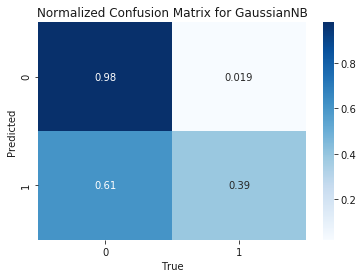

In [129]:
from sklearn.metrics import confusion_matrix

model = best_model

y_pred = model.predict(X_test)
all_labels = list(set(y_test))
CM = confusion_matrix(y_test, y_pred, labels=all_labels)
CM = CM / CM.sum(axis=1, keepdims=True)

CM = pd.DataFrame(CM, index=all_labels, columns=all_labels)

FN = CM.values[0,1] / CM.values[0,:].sum()
FP = CM.values[1,0] / CM.values[1,:].sum()
N  = sum(y_pred==0)
n_test = len(y_test)

print(f'False Positives: {round(FP*100,1)}%')
print(f'False Negatives: {round(FN*100,1)}%')
print(f'Negative Results: {round(N/n_test*100,1)}%')
        

plt.figure()
sns.heatmap(CM, annot=True, cmap="Blues")
model_class = str(model.__class__).split('.')[-1][:-2]
plt.title(f'Normalized Confusion Matrix for {model_class}')
plt.xlabel('True')
plt.ylabel('Predicted')

On the one hand, the Confusion Matrix above shows low values for False Negative. This result is interesting for our goal.

On the other hand, the False Positive is extremelly high. Therefore, the model can not reliably predict Positive. Instead, 1 will mean "Inconclusive".

The split above was random. Nonetheless, I have some concerns about the fact that only 10% are positive and the dataset contains only around 600 cases.

Therefore, let's create several times the same type of classifier training over a different split of data in order to evaluate its performance with statistical meaning (average and standard deviation). This cross-validation approach help us to avoid overtraining.

In [137]:
import numpy as np

n_cross_valid = 599
    
n_test = len(y_test)

FP = []
FN = []
NN = []
CM = np.zeros((2,2))

for i in range(n_cross_valid):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,
        test_size=0.5, shuffle=True)

#     model = RandomForestClassifier(max_depth=2, n_estimators=100)
    model = RidgeClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    CM = confusion_matrix(y_test, y_pred, labels=[0, 1])
    if (CM[:,1].sum() > 0):# and (np.isnan(CM).sum().sum() == 0):
        FN.append(CM[0,1] / CM[0,:].sum())
        FP.append(CM[1,0] / CM[1,:].sum())
        NN.append(CM[0,:].sum() / CM.sum())
    

print(f'Valid cross validations: {len(N)} out of {n_cross_valid}')
print(f'False Positives: {round(np.mean(FP)*100,1)}% +- {round(np.std(FP, ddof=1)*100,1)}%')
print(f'False Negatives: {round(np.mean(FN)*100,1)}% +- {round(np.std(FN, ddof=1)*100,1)}%')
print(f'Negative Results: {round(np.mean(NN)*100,1)}% +- {round(np.std(N, ddof=1)/n_test*100,1)}%')

Valid cross validations: 187 out of 599
False Positives: 99.4% +- 1.3%
False Negatives: 0.4% +- 0.2%
Negative Results: 86.7% +- 1.4%


The results above are interesting: high amount of 'Negative Results' along with a low 'False Negatives'. These results have some standard deviation generated from the many cross validations, which allow us to improve the confidence of our claims by applying the statistical p-value tests.

# Conclusion

Our new classifier is promising.


It is valuable to tell which patients do not need to perform the SARS-Cov-2 test. Instead, the new suspects get through a simple hemogram which is cheaper and faster. The main benefits of this new procedure are:

    - 86% of the suspects from this sample were predicted as 'Negative', which could have saved 86% of the SARS-CoV-2 RT-PCR test kits; and
    - Automated result using the new classifier created in this notebook, increasing throughput of suspects admitted to the ICU.
   
   
However, it is not a flawless test since:
    - 0.4% of the above ('Negative' for the blood test) would in fact be 'Positive' for the SARS-Cov-2 test. It can be tuned, though;
    - The other 14% of the suspects will have result as 'Inconclusive' and shall move forward with the SARS-Cov-2 test; and
    - This dataset is restrict to a small parcel so there is no guarantee when applied to different population or time frame.


The value of this new classifier is the capability of handling the following scenarios:
- Shortage of SARS-CoV-2 RT-PCR test kits; and
- Crowded ICU that can not wait for the long delays associated to the SARS-Cov-2 results for all the suspects.